In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def read_market_data(fileName):
    df = pd.read_csv(fileName).fillna("")
    cols = df.columns.tolist()[0].split(';')
    fin = pd.DataFrame(df.iloc[:, 0].apply(
        lambda x: x.split(';')).values.tolist(), columns=cols)
    to_float_cols = ['day', 'timestamp', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
                     'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss']
    fin[to_float_cols] = fin[to_float_cols].applymap(
        lambda x: float(x) if x != '' else '')
    return fin


def split_data_by_product(df):
    markets = dict()
    products = df['product'].unique().tolist()
    for prod in products:
        markets[prod] = df[df['product'] == prod]
    return markets


In [26]:
data = read_market_data('../r4.csv')
markets = split_data_by_product(data)


In [27]:
bananas = pd.DataFrame(markets['PICNIC_BASKET']['mid_price'])


In [28]:
x = bananas.index
y = bananas.values

DEGREE = 31

modelCoeff = np.polyfit(x, y, DEGREE)
def model(x):
    s = 0
    degree = len(modelCoeff) - 1
    for i in range(degree+1):
        s += modelCoeff[i] * x**(degree-i)
    return s

del x, y, DEGREE

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/polynomial.py:666: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [29]:
domain = np.linspace(1, 110000, 4000)
predictions = np.vectorize(model)(domain)

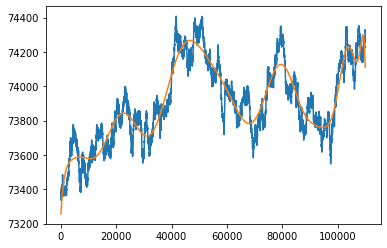

In [30]:
plt.plot(bananas.index, bananas.values)
plt.plot(domain, predictions)
